In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

### Importing Data Set:

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


### Exploratory Data Analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
sample index    400 non-null object
class_label     400 non-null float64
sensor0         400 non-null float64
sensor1         400 non-null float64
sensor2         400 non-null float64
sensor3         400 non-null float64
sensor4         400 non-null float64
sensor5         400 non-null float64
sensor6         400 non-null float64
sensor7         400 non-null float64
sensor8         400 non-null float64
sensor9         400 non-null float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [5]:
df.describe() # Shows statistical features of only those columns having Numerical values. Which is obvious!

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [6]:
df.isnull().head() # Checking only head of the dataframe, cuz I have already tested it. Calling head method
# on entire dataset makes it a humangous cell output. We'll confirm it later through visualizations!

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df['class_label'].value_counts() # Equal proportion of Classes!

-1.0    200
 1.0    200
Name: class_label, dtype: int64

In [8]:
df.columns

Index(['sample index', 'class_label', 'sensor0', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8',
       'sensor9'],
      dtype='object')

In [9]:
df.drop('sample index', axis = 1, inplace = True)

In [11]:
df.head() # Check Point!

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


### Finding Correlations of The Features:

In [12]:
df.corr()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,1.000000,0.543295,-0.252007,0.038775,0.433636,0.607623,0.224147,-0.007414,0.175612,0.660618,0.094907
sensor0,0.543295,1.000000,-0.215668,0.019521,0.253244,0.300760,0.164243,-0.007849,0.080306,0.361751,0.001317
sensor1,-0.252007,-0.215668,1.000000,0.056042,-0.111347,-0.130463,0.055401,-0.106082,0.031513,-0.163818,-0.023655
sensor2,0.038775,0.019521,0.056042,1.000000,0.093447,-0.023486,-0.008948,-0.057090,0.006899,-0.008308,-0.058528
sensor3,0.433636,0.253244,-0.111347,0.093447,1.000000,0.295136,0.038152,-0.105005,0.001243,0.287776,0.013732
sensor4,0.607623,0.300760,-0.130463,-0.023486,0.295136,1.000000,0.183916,-0.022690,0.090186,0.378306,0.023776
sensor5,0.224147,0.164243,0.055401,-0.008948,0.038152,0.183916,1.000000,-0.061238,0.020814,0.220014,0.071258
sensor6,-0.007414,-0.007849,-0.106082,-0.057090,-0.105005,-0.022690,-0.061238,1.000000,0.065211,-0.073309,0.040744
sensor7,0.175612,0.080306,0.031513,0.006899,0.001243,0.090186,0.020814,0.065211,1.000000,0.060028,0.059341
sensor8,0.660618,0.361751,-0.163818,-0.008308,0.287776,0.378306,0.220014,-0.073309,0.060028,1.000000,-0.033991


In [37]:
corr_list = []

for index,column in enumerate(df[:]):
    corr = df['class_label'].corr(df[column])
    print('Feature {} : Correlation {}'.format(column, corr))
    corr_list.append(corr)

Feature class_label : Correlation 1.0
Feature sensor0 : Correlation 0.5432950594605451
Feature sensor1 : Correlation -0.25200734226009575
Feature sensor2 : Correlation 0.03877543484999283
Feature sensor3 : Correlation 0.43363644436420123
Feature sensor4 : Correlation 0.6076228345496761
Feature sensor5 : Correlation 0.22414719421524462
Feature sensor6 : Correlation -0.0074144251226751475
Feature sensor7 : Correlation 0.1756121918018469
Feature sensor8 : Correlation 0.6606179222510381
Feature sensor9 : Correlation 0.09490706714608717


In [38]:
#ranked_correlations = sorted(corr_list, reverse = True)

#print(ranked_correlations) # Check Point!

In [119]:
df['sensor0'].corr(df['sensor9'])

0.0013165657520929522

In [109]:
df['sensor1'].corr(df['sensor9'])

-0.02365495273856215

In [110]:
df['sensor2'].corr(df['sensor9'])

-0.05852832526643016

In [122]:
df['sensor3'].corr(df['sensor9'])

0.013731608990796578

In [124]:
# df.drop('sample index', axis = 1, inplace = True)

In [125]:
df.head() # -> CHECK POINT

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


### Data Visualization:

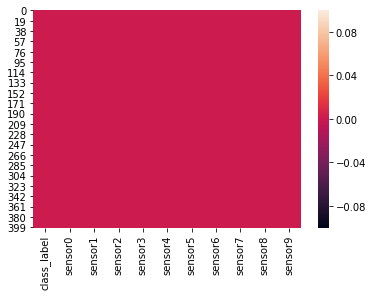

In [90]:
# lets confirm if we have any null value inside our data set

sns.heatmap(data = df.isnull())

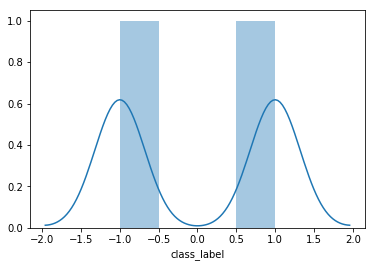

In [128]:
# Univeriate Plotting

sns.distplot(df['class_label']) 

# Equally distribute which was obvious from EDA we performed earlier!

In [129]:
# Lets grab few more plots, and see if we find some important information regarding our data set

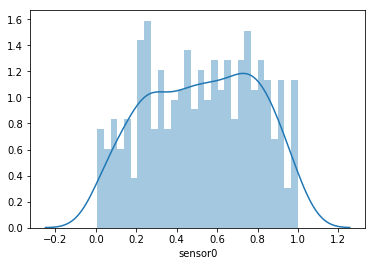

In [130]:
sns.distplot(df['sensor0'], kde = True, bins = 30)

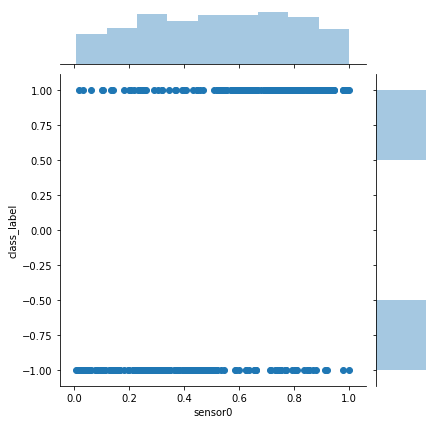

In [131]:
# Bivariate Plotting

sns.jointplot(x = 'sensor0', y = 'class_label', data = df)

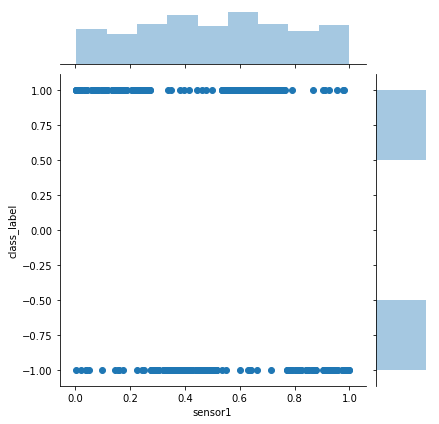

In [132]:
sns.jointplot(x = 'sensor1', y = 'class_label', data = df)

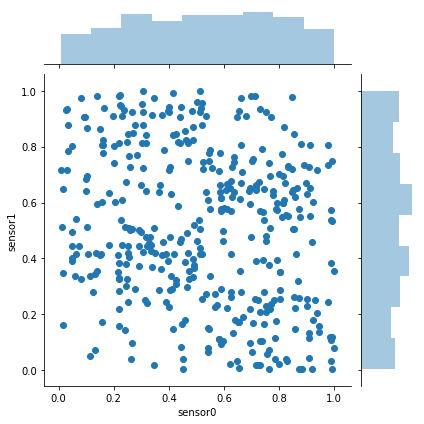

In [133]:
sns.jointplot(x = 'sensor0', y = 'sensor1', data = df)

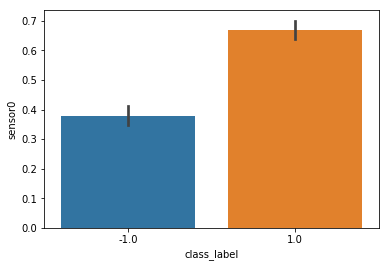

In [134]:
sns.barplot(x = 'class_label', y = 'sensor0', data = df)

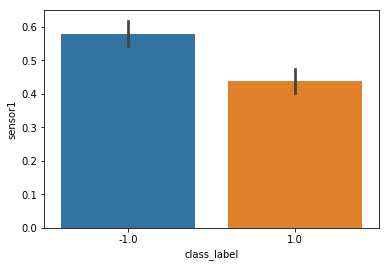

In [135]:
sns.barplot(x = 'class_label', y = 'sensor1', data = df)

### Data Normalization and Features Scaling:

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
print(scaler.mean_)

[0.         0.52366059 0.50922306 0.48123849 0.50975199 0.49787532
 0.50106504 0.49048014 0.4823716  0.48282233 0.54193334]


In [43]:
df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [44]:
scaled_features = scaler.transform(df)

In [52]:
df_feat = pd.DataFrame(data = scaled_features, columns = df.columns[:])

In [54]:
df_feat.head()

# Perfect! Now we have perfectly standardized and scaled dataframe

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,1.159533,0.784209,0.190322,-0.991648,1.305944,0.927822,-1.309333,0.266167,0.394942,0.454293
1,1.0,1.046817,-0.926072,1.353050,-0.590123,0.368943,-0.024436,1.184756,-1.020618,-1.581615,0.958976
2,1.0,0.637440,0.312997,0.348354,0.972798,0.920561,0.523290,-1.431585,-1.682906,0.597719,1.062195
3,1.0,0.970771,-1.701231,-0.683073,0.395351,1.051752,-0.051257,1.164548,-0.504903,0.840140,1.287622
4,1.0,0.989982,-1.210676,-0.461201,1.441087,0.674625,-0.429712,-1.059149,0.476105,0.034065,1.429494


### Features Engineerig with PCA:

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components = 4) #jhjksd

In [59]:
pca.fit(scaled_features)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
# Transforms the data to first two components
x_pca = pca.transform(scaled_features)

In [63]:
x_pca.shape # CheckPoint!

(400, 4)

In [64]:
type(x_pca)

numpy.ndarray

In [65]:
df_pca = pd.DataFrame(x_pca)

In [66]:
df_pca.head()

,0,1,2,3
0,-1.503023,-0.871964,-1.508148,0.299514
1,-0.303019,0.980826,0.659866,-0.440424
2,-1.718560,-1.492466,-0.132528,1.324919
3,-2.114390,2.001712,0.553877,0.753356
4,-1.971729,0.456742,0.167317,0.144092


### My Own Assumption:

In [79]:
# lets grab the dataframe first
# and also the correlations of each feature with our target class we figured out earlier!

df.head()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [84]:
cr = df.corr()

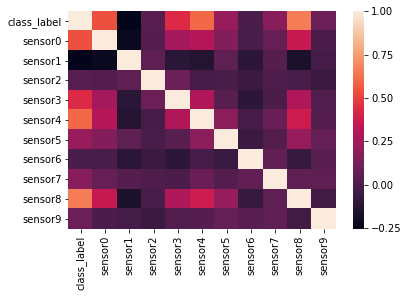

In [87]:
sns.heatmap(data = cr)

# As a Data Scientist, you have to have a very good bird eye view on the importance of feature at first glace!


In [ ]:
# Now that, we have performed EDA, Data visualization, Data Normalization, Features extraction!
# Data Scaling and Transformation, we are ready to predict classes off of this final dataframe!

In [48]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('class_label', axis = 1)
y = df['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(X_train, y_train)

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
predictions = log_model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[50  5]
 [ 6 59]]


              precision    recall  f1-score   support

        -1.0       0.89      0.91      0.90        55
         1.0       0.92      0.91      0.91        65

   micro avg       0.91      0.91      0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print(accuracy)

0.9083333333333333


In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components = 6)

In [45]:
pca.fit(df.drop('class_label', axis = 1))

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
x_pca = pca.transform(df.drop('class_label', axis = 1))

In [47]:
x_pca.shape

(400, 6)

In [48]:
df_pca = pd.DataFrame(data = x_pca)

In [49]:
df_pca.head()

,0,1,2,3,4,5
0,-0.307421,-0.210411,-0.481952,0.012708,0.032960,0.056380
1,0.148512,0.210618,0.246890,-0.142949,0.171840,-0.620987
2,-0.438685,-0.444488,-0.041463,0.340470,-0.221032,-0.360112
3,-0.492798,0.568961,0.184337,0.182444,-0.089692,-0.303522
4,-0.473759,0.061023,0.151430,0.042196,-0.602934,-0.082929


In [50]:
X1 = df_pca
y1 = df['class_label']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 101)

In [51]:
log_model.fit(X1,y1)

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions_1 = log_model.predict(X1_test)

In [53]:
print(confusion_matrix(y1_test, predictions_1))
print('\n')
print(classification_report(y1_test, predictions_1))

[[49  6]
 [ 6 59]]


              precision    recall  f1-score   support

        -1.0       0.89      0.89      0.89        55
         1.0       0.91      0.91      0.91        65

   micro avg       0.90      0.90      0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



In [54]:
accuracy_ = accuracy_score(y1_test, predictions_1)

In [55]:
accuracy

0.9083333333333333

In [92]:
# Implementation of KNN
# right now I'm just coding and analysing the results,
# later on I'll explaing everything whats going on in depth!

In [57]:
# Lets go ahead and standardize the variables first
# I'll explain later why?

from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
df.head()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [61]:
scaler.fit(df.drop('class_label', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
print(scaler.mean_) # mean of standardized scaler column values

[0.52366059 0.50922306 0.48123849 0.50975199 0.49787532 0.50106504
 0.49048014 0.4823716  0.48282233 0.54193334]


In [64]:
# now lets go ahead and find out scaled features

scaled_features = scaler.transform(df.drop('class_label', axis = 1))

In [66]:
scaled_features # that help a lot while implementing our algorithm, i.e standardizing our data set

array([[ 1.15953276,  0.78420926,  0.19032229, ...,  0.26616688,
         0.39494164,  0.45429295],
       [ 1.04681712, -0.92607232,  1.35304962, ..., -1.02061804,
        -1.58161519,  0.95897578],
       [ 0.63744049,  0.31299726,  0.34835411, ..., -1.68290552,
         0.59771893,  1.06219477],
       ...,
       [-0.75988928, -0.23242273, -0.27623704, ..., -0.89114076,
        -0.94050715,  0.0623016 ],
       [-1.73423193, -0.62125649,  1.01526455, ..., -1.58142957,
        -0.75757973,  0.61739875],
       [-0.53716057, -0.17707468, -0.87729932, ...,  0.22649287,
        -0.40463859, -1.34228323]])

In [69]:
# lets now create a dataframe off of those scaled features
 
df_feat = pd.DataFrame(scaled_features, columns = df.columns[1:])

# since we don't need this column 'class_label' which is our dependent variable, so I'm gonna chop it off
# for a while

In [70]:
df_feat.head()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.159533,0.784209,0.190322,-0.991648,1.305944,0.927822,-1.309333,0.266167,0.394942,0.454293
1,1.046817,-0.926072,1.353050,-0.590123,0.368943,-0.024436,1.184756,-1.020618,-1.581615,0.958976
2,0.637440,0.312997,0.348354,0.972798,0.920561,0.523290,-1.431585,-1.682906,0.597719,1.062195
3,0.970771,-1.701231,-0.683073,0.395351,1.051752,-0.051257,1.164548,-0.504903,0.840140,1.287622
4,0.989982,-1.210676,-0.461201,1.441087,0.674625,-0.429712,-1.059149,0.476105,0.034065,1.429494


In [75]:
X2 = scaled_features
y2 = df['class_label']


from sklearn.model_selection import train_test_split

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_features, y2, test_size = 0.3, random_state = 101)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)

In [85]:
knn.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [87]:
predictions_3 = knn.predict(X2_test)

In [88]:
# let's evaluate our knn model

from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(confusion_matrix(y_test, predictions_3))
print('\n')
print('\t')
print('classification report:')
print('\n')
print('\t')
print(classification_report(y_test, predictions_3))

[[53  2]
 [ 6 59]]


	
classification report:


	
              precision    recall  f1-score   support

        -1.0       0.90      0.96      0.93        55
         1.0       0.97      0.91      0.94        65

   micro avg       0.93      0.93      0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [91]:
# Awesome! we got amazing results
# That's where Standardizing helps!